In [ ]:

! pip install nltk textblob scikit-learn numpy pandas matplotlib seaborn


In [7]:
import pandas as pd
import numpy as np

# NLP tools
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix


# Download VADER lexicon
nltk.download('vader_lexicon')


# 1. Load Dataset
data = pd.read_csv('IMDB_Dataset.csv')

# Encode labels: positive -> 1, negative -> 0
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})


# 2. Feature Extraction

sia = SentimentIntensityAnalyzer()

def vader_polarity(text):
    return sia.polarity_scores(text)['compound']

def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

data['vader_score'] = data['review'].apply(vader_polarity)
data['textblob_score'] = data['review'].apply(textblob_polarity)

# Feature matrix and labels
X = data[['vader_score', 'textblob_score']]
y = data['sentiment']

# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Feature Scaling (IMPORTANT for MLP)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 5. MLP Classifier

mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train, y_train)

# 6. Evaluation

y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zineb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy: 0.7747

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      4961
           1       0.79      0.76      0.77      5039

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



Accuracy : 0.7747
Precision: 0.7875722543352601
Recall   : 0.7570946616392141
F1-score : 0.7720327835677426

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      4961
           1       0.79      0.76      0.77      5039

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



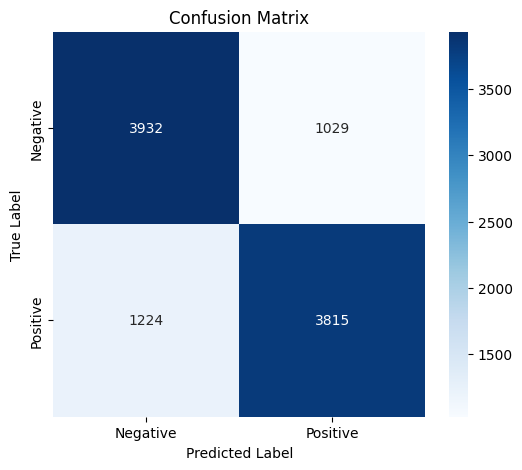

In [8]:


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    precision_score,
    recall_score,
    f1_score
)
# Predictions
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
